# Complexity Analysis

In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

from sympy import *
import optpoly

## Parameters

In [2]:
l = 0
L = 1

In [3]:
(c, _) = optpoly.l_2_opt(3, l, L, verbose=True)
(C, _) = optpoly.l_2_opt(7, l, L, verbose=True)

L-2 optimized polynomial.
> Degree:   3
> Spectrum: [0.00, 1.00]
> Resulting polynomial: -25.2000007629395*x**3 + 56.0*x**2 - 42.0*x + 12.0
L-2 optimized polynomial.
> Degree:   7
> Spectrum: [0.00, 1.00]
> Resulting polynomial: -2701.10498046875*x**7 + 11439.9755859375*x**6 - 20019.9609375*x**5 + 18685.30078125*x**4 - 10009.984375*x**3 + 3079.99609375*x**2 - 513.332824707031*x + 39.9999809265137


## Plots

In [4]:
x = symbols("x")
ax_x = np.linspace(l, L, 2000 + 1)

In [5]:
def eval_poly(c):
    if c.size == 1:
        return c[0]
    return c[0] + ax_x * eval_poly(c[1:])

In [6]:
f_pgd  = np.abs(1 - ax_x)**(3 + 1)
f_ppgd = np.abs(1 - eval_poly(c) * ax_x)
f_PPGD = np.abs(1 - eval_poly(C) * ax_x)

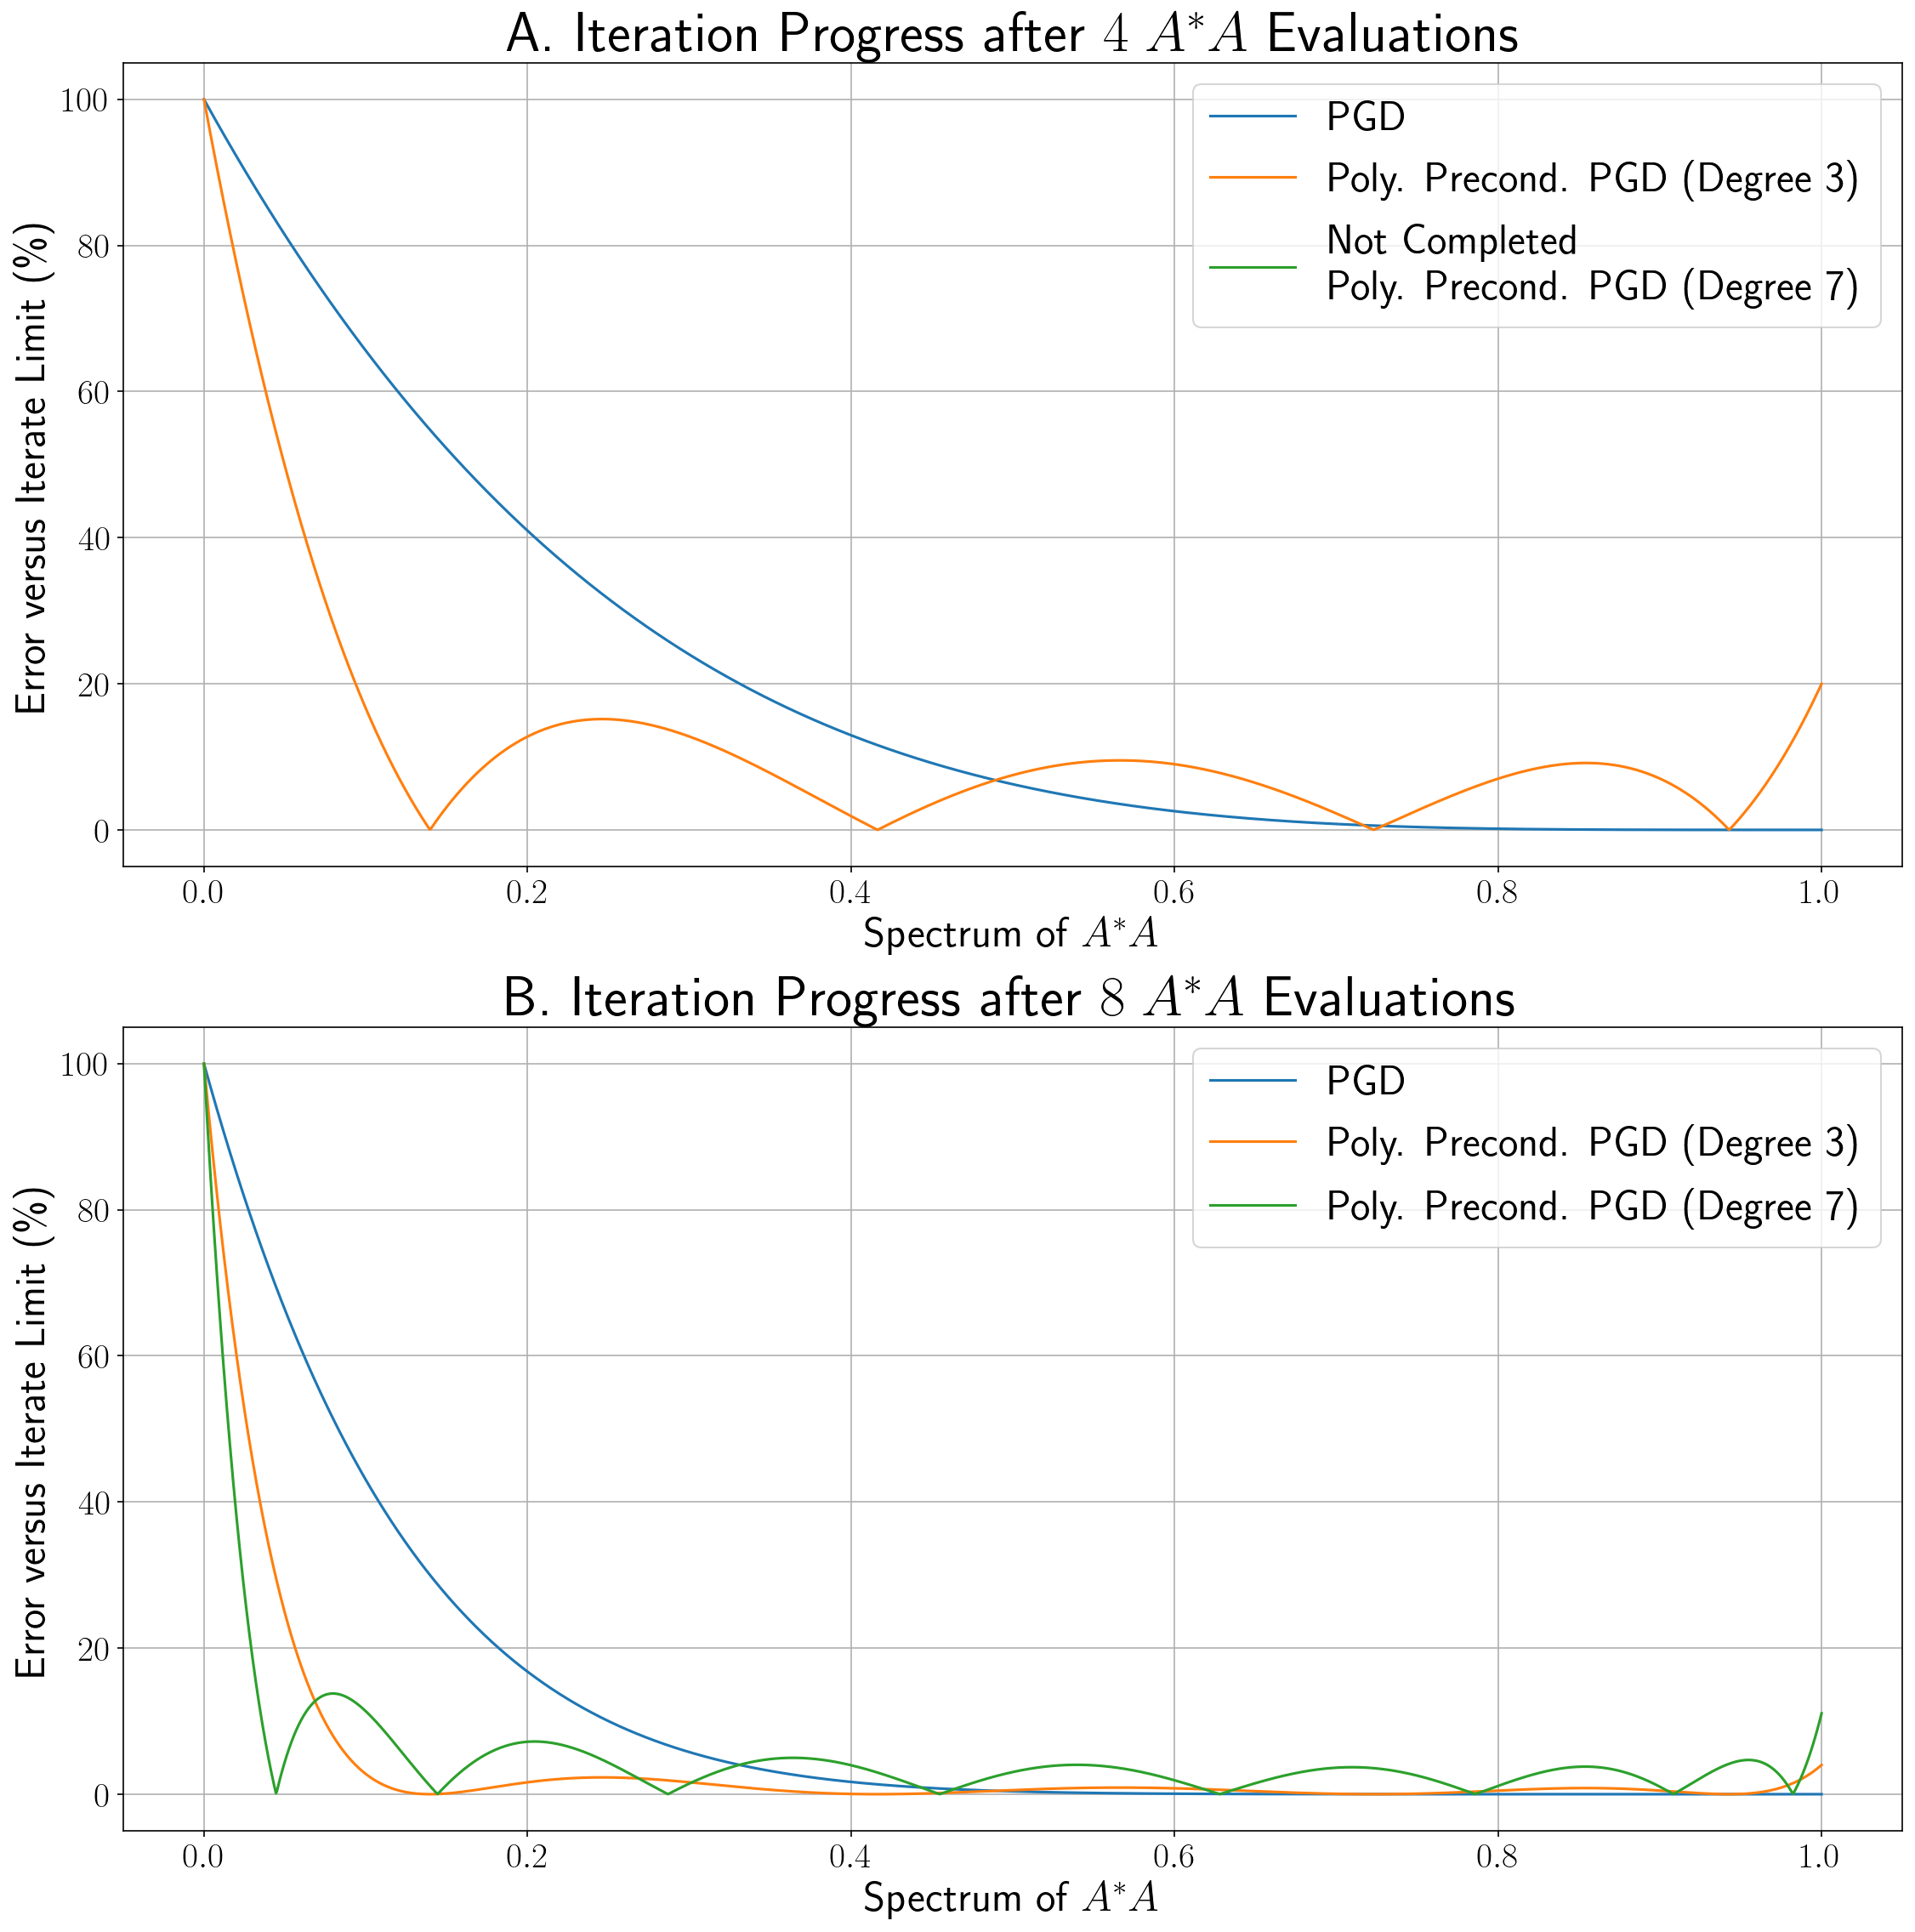

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(18, 18), dpi=150)

axs[0].plot(ax_x, 100 * f_pgd)
axs[0].plot(ax_x, 100 * f_ppgd)
axs[0].plot([], [])

axs[1].plot(ax_x, 100 * f_pgd**2)
axs[1].plot(ax_x, 100 * f_ppgd**2)
axs[1].plot(ax_x, 100 * f_PPGD)

axs[0].legend(["PGD", "Poly. Precond. PGD (Degree 3)", "Not Completed\nPoly. Precond. PGD (Degree 7)"], fontsize=24)
axs[1].legend(["PGD", "Poly. Precond. PGD (Degree 3)", "Poly. Precond. PGD (Degree 7)"], fontsize=24)

axs[0].set_title("A. Iteration Progress after $%d\;A^*A$ Evaluations" % (3 + 1), fontsize=32)
axs[1].set_title("B. Iteration Progress after $%d\;A^*A$ Evaluations" % (7 + 1), fontsize=32)

for ax in axs.ravel():
    ax.grid()
    ax.set_xlabel(r"Spectrum of $A^*A$", fontsize=24)
    ax.set_ylabel("Error versus Iterate Limit (\%)", fontsize=24)

## Done.